In [1]:
import os
import sys
import joblib
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\Users\Koushik\Desktop\All Files\Master Project\healthcare-fraud-detection\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

In [9]:
# Load processed data
df = pd.read_csv(
    os.path.join(PROJECT_ROOT, "data", "processed", "provider_features_train.csv")
)

# Recreate derived feature used during training
df["has_inpatient"] = df["avg_cost_per_day"].notnull().astype(int)


# Define features and target
X = df.drop(columns=["PotentialFraud"])
y = df["PotentialFraud"].map({"Yes": 1, "No": 0})

X.head()

,total_claims,total_reimbursed,avg_reimbursed,avg_duration_gap,pct_claimed_gt_admitted,avg_cost_per_day,age_avg,pct_chronic,has_inpatient
0,2968.0,1386100,467.014825,2452.0,1,2686.240310,43.464791,0.113881,1
1,988.0,508210,514.382591,837.0,1,3365.629139,52.763158,0.135628,1
2,2287.0,502010,219.505903,2287.0,1,NaN,58.911544,0.150415,0
3,193.0,74320,385.077720,158.0,1,2123.428571,29.807772,0.062176,1
4,335.0,60910,181.820896,335.0,1,NaN,54.431045,0.146269,0


In [10]:
model = joblib.load(
    os.path.join(PROJECT_ROOT, "models", "fraud_model.joblib")
)

In [11]:
preprocessor = model.named_steps["preprocessing"]
clf = model.named_steps["model"]

In [12]:
X_transformed = preprocessor.transform(X)

In [13]:
feature_names = X.columns.tolist()

### Building SHAP Explainer

In [14]:
explainer = shap.LinearExplainer(
    clf,
    X_transformed,
    feature_names=feature_names
)

shap_values = explainer(X_transformed)

### GLOBAL EXPLANATION

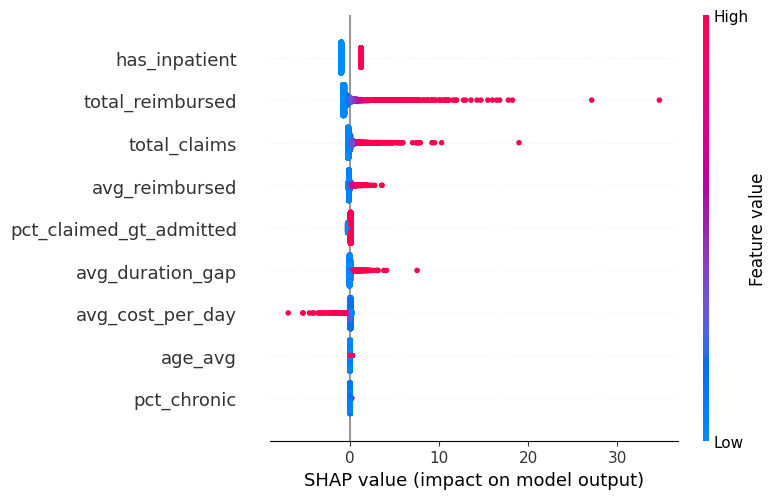

In [15]:
shap.summary_plot(
    shap_values.values,
    X,
    feature_names=feature_names
)

### DIRECTIONAL EXPLANATION

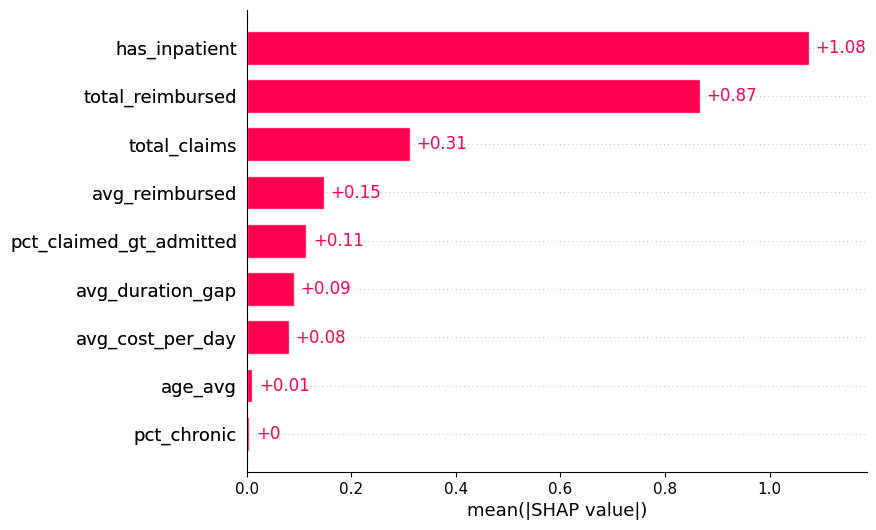

In [16]:
shap.plots.bar(shap_values)

### SINGLE PROVIDER EXPLANATION

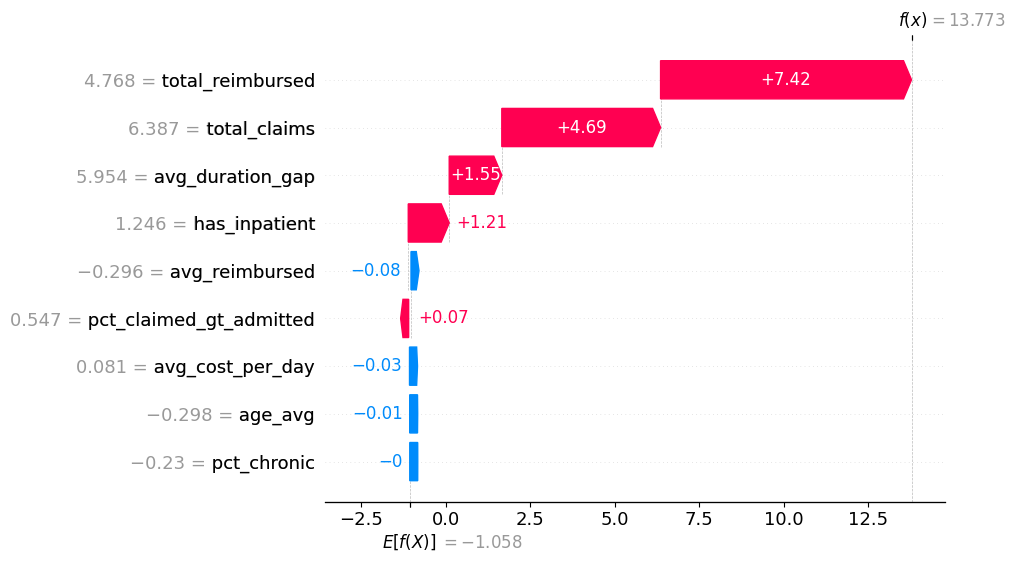

In [17]:
idx = 0  # any index (provider)

shap.plots.waterfall(shap_values[idx])